# Predict Wine Quality with Regularization

## Introduction

In this project, we will be working with data from the **Wine Quality Dataset** hosted on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/186/wine+quality). Specifically, we’ll focus on the red wine data. While the original dataset assigns a quality rating from 1 to 10 for each wine, we have reframed the problem as a binary classification task:

- **Good wine**: Quality rating > 5 (labeled as `1`)
- **Bad wine**: Quality rating ≤ 5 (labeled as `0`)

## Goals

The goals of this project are to:

1. Implement and evaluate different logistic regression classifiers.
2. Identify the best ridge-regularized classifier through hyperparameter tuning.
3. Develop a lasso-regularized feature selection approach to identify the most important input variables.

## Dataset Overview

The dataset includes **11 input variables** derived from physicochemical tests:

- `fixed acidity`
- `volatile acidity`
- `citric acid`
- `residual sugar`
- `chlorides`
- `free sulfur dioxide`
- `total sulfur dioxide`
- `density`
- `pH`
- `sulphates`
- `alcohol`

The **output variable** is `quality`, represented as a binary classification (`0` for bad, `1` for good).

## Source and Citation

The original dataset is credited to:  
Cortez, P., Cerdeira, A., Almeida, F., Matos, T., & Reis, J. (2009). *Wine Quality [Dataset].* UCI Machine Learning Repository. [https://doi.org/10.24432/C56S3T](https://doi.org/10.24432/C56S3T)

---

This project explores the interplay between wine characteristics and quality, leveraging logistic regression techniques to gain insights into how physicochemical properties influence the perception of wine quality.


In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('winequality-red.csv', sep=';')
print(df.columns)


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [37]:
df['quality_binary'] = df['quality'].apply(lambda x: 1 if x > 5 else 0)
y = df['quality_binary']
features = df.drop(columns=['quality', 'quality_binary'])

In [38]:
## 1. Data transformation
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(features)

In [39]:
## 2. Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [40]:
## 3. Fit a logistic regression classifier without regularization
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty = None)
clf_no_reg = lr.fit(X_train, y_train)

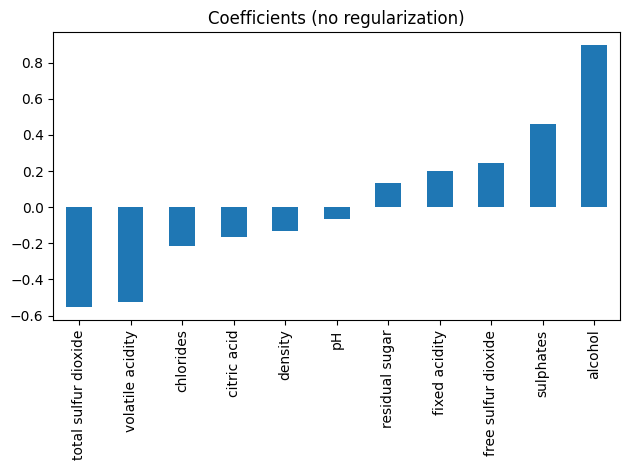

<Figure size 640x480 with 0 Axes>

In [41]:
## 4. Plot the coefficients
predictors = features.columns
coefficients = clf_no_reg.coef_.ravel()
coef = pd.Series(coefficients,predictors).sort_values()
coef.plot(kind='bar', title = 'Coefficients (no regularization)')
plt.tight_layout()
plt.show()
plt.clf()

In [42]:
## 5. Training and test performance
from sklearn.metrics import f1_score
y_pred_test = clf_no_reg.predict(X_test)
y_pred_train = clf_no_reg.predict(X_train)
print('Training Score', f1_score(y_train, y_pred_train))
print('Testing Score', f1_score(y_test, y_pred_test))

Training Score 0.7727598566308244
Testing Score 0.7266666666666667


In [43]:
## 6. Default Implementation (L2-regularized!)
lr_default = LogisticRegression()
clf_default = lr_default.fit(X_train, y_train)

In [44]:
## 7. Ridge Scores
y_pred_test_def = clf_default.predict(X_test)
y_pred_train_def = clf_default.predict(X_train)
print('Training Score for L2-reg (default)', f1_score(y_train, y_pred_train_def))
print('Testing Score for L2-reg (default)', f1_score(y_test, y_pred_test_def))

Training Score for L2-reg (default) 0.7727598566308244
Testing Score for L2-reg (default) 0.7266666666666667


In [45]:
## 8. Coarse-grained hyperparameter tuning
training_array = []
test_array = []
C_array = [0.0001, 0.001, 0.01, 0.1, 1]
for c in C_array:
  lr_default_c = LogisticRegression(C = c)
  clf_default_c = lr_default_c.fit(X_train, y_train)
  y_pred_test_def_c = clf_default_c.predict(X_test)
  test_array.append(f1_score(y_test, y_pred_test_def_c))
  y_pred_train_def_c = clf_default_c.predict(X_train)
  training_array.append(f1_score(y_train, y_pred_train_def_c))

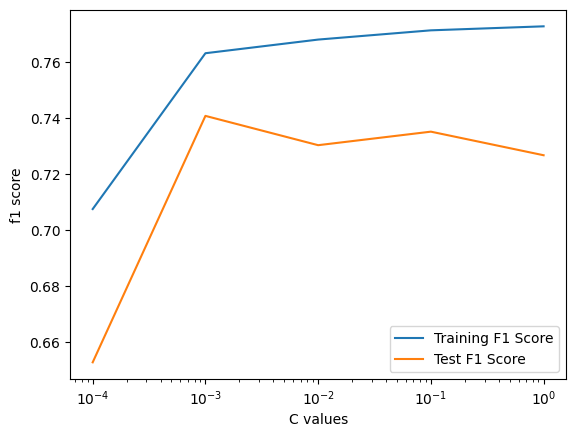

<Figure size 640x480 with 0 Axes>

In [46]:
## 9. Plot training and test scores as a function of C
plt.plot(C_array,training_array, label='Training F1 Score')
plt.plot(C_array,test_array, label='Test F1 Score')
plt.ylabel('f1 score')
plt.xlabel('C values')
plt.xscale('log')
plt.legend()
plt.show()
plt.clf()

In [47]:
## 10. Making a parameter grid for GridSearchCV
C_values = np.logspace(-4, -2, 100)
print(C_values)
tuning_C = {'C': C_values}
print(tuning_C)

[0.0001     0.00010476 0.00010975 0.00011498 0.00012045 0.00012619
 0.00013219 0.00013849 0.00014508 0.00015199 0.00015923 0.00016681
 0.00017475 0.00018307 0.00019179 0.00020092 0.00021049 0.00022051
 0.00023101 0.00024201 0.00025354 0.00026561 0.00027826 0.00029151
 0.00030539 0.00031993 0.00033516 0.00035112 0.00036784 0.00038535
 0.0004037  0.00042292 0.00044306 0.00046416 0.00048626 0.00050941
 0.00053367 0.00055908 0.0005857  0.00061359 0.00064281 0.00067342
 0.00070548 0.00073907 0.00077426 0.00081113 0.00084975 0.00089022
 0.0009326  0.00097701 0.00102353 0.00107227 0.00112332 0.00117681
 0.00123285 0.00129155 0.00135305 0.00141747 0.00148497 0.00155568
 0.00162975 0.00170735 0.00178865 0.00187382 0.00196304 0.00205651
 0.00215443 0.00225702 0.00236449 0.00247708 0.00259502 0.00271859
 0.00284804 0.00298365 0.00312572 0.00327455 0.00343047 0.00359381
 0.00376494 0.00394421 0.00413201 0.00432876 0.00453488 0.00475081
 0.00497702 0.00521401 0.00546228 0.00572237 0.00599484 0.0062

In [48]:
## 11. Implementing GridSearchCV with l2 penalty
from sklearn.model_selection import GridSearchCV

log_reg = LogisticRegression(penalty='l2', solver='liblinear')

grid_search = GridSearchCV(estimator = log_reg,
param_grid = tuning_C,
scoring = 'f1',
cv = 5)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': array([0.0001    , 0.00010476, 0.00010975, 0.00011498, 0.00012045,
       0.00012619, 0.00013219, 0.00013849, 0.00014508, 0.00015199,
       0.00015923, 0.00016681, 0.00017475, 0.00018307, 0.00019179,
       0.00020092, 0.00021049, 0.00022051, 0.00023101, 0.00024201,
       0.00025354, 0.00026561, 0.00027826, 0.00029151,...
       0.00205651, 0.00215443, 0.00225702, 0.00236449, 0.00247708,
       0.00259502, 0.00271859, 0.00284804, 0.00298365, 0.00312572,
       0.00327455, 0.00343047, 0.00359381, 0.00376494, 0.00394421,
       0.00413201, 0.00432876, 0.00453488, 0.00475081, 0.00497702,
       0.00521401, 0.00546228, 0.00572237, 0.00599484, 0.00628029,
       0.00657933, 0.00689261, 0.00722081, 0.00756463, 0.00792483,
       0.00830218, 0.00869749, 0.00911163, 0.00954548, 0.01      ])},
             scoring='f1')

In [49]:
## 12. Optimal C value and the score corresponding to it
print(f"The best f1 score comes from C={grid_search.best_params_['C']:.6f} and is f1={grid_search.best_score_:.4f}")



The best f1 score comes from C=0.006893 and is f1=0.7551


In [50]:
## 13. Validating the "best classifier"
clf_best_ridge = LogisticRegression( C = grid_search.best_params_['C'], penalty = 'l2')
clf_best_ridge.fit(X_test, y_test)
y_pred_gs = clf_best_ridge.predict(X_test)
test_f1_score_gs = f1_score(y_test, y_pred_gs)
print(f"Executing the logreg with the same C (C = {grid_search.best_params_['C']:.6f}) for the test dataset, now f1 is: {test_f1_score_gs:.4f}")

Executing the logreg with the same C (C = 0.006893) for the test dataset, now f1 is: 0.6831


In [51]:
## 14. Implement L1 hyperparameter tuning with LogisticRegressionCV
from sklearn.linear_model import LogisticRegressionCV
# Define the list of C values to test
Cs_values = np.logspace(-2, 2, 100)  # Values between 0.01 and 100

# Create the cross-validated logistic regression classifier
clf_l1 = LogisticRegressionCV(
    Cs=Cs_values,
    cv=5,               # 5-fold cross-validation
    penalty='l1',       # L1 regularization
    solver='liblinear', # Solver that supports L1
    scoring='f1',       # F1 score as the metric
    max_iter=1000       # Optional: Increase max iterations if convergence warnings occur
)
clf_l1.fit(X, y)

LogisticRegressionCV(Cs=array([1.00000000e-02, 1.09749877e-02, 1.20450354e-02, 1.32194115e-02,
       1.45082878e-02, 1.59228279e-02, 1.74752840e-02, 1.91791026e-02,
       2.10490414e-02, 2.31012970e-02, 2.53536449e-02, 2.78255940e-02,
       3.05385551e-02, 3.35160265e-02, 3.67837977e-02, 4.03701726e-02,
       4.43062146e-02, 4.86260158e-02, 5.33669923e-02, 5.85702082e-02,
       6.42807312e-02, 7.05...
       1.70735265e+01, 1.87381742e+01, 2.05651231e+01, 2.25701972e+01,
       2.47707636e+01, 2.71858824e+01, 2.98364724e+01, 3.27454916e+01,
       3.59381366e+01, 3.94420606e+01, 4.32876128e+01, 4.75081016e+01,
       5.21400829e+01, 5.72236766e+01, 6.28029144e+01, 6.89261210e+01,
       7.56463328e+01, 8.30217568e+01, 9.11162756e+01, 1.00000000e+02]),
                     cv=5, max_iter=1000, penalty='l1', scoring='f1',
                     solver='liblinear')

In [52]:
## 15. Optimal C value and corresponding coefficients
# Output the best C value found
print(f"Best C value for LogRegCV: {clf_l1.C_[0]}")
print(f"Mean cross-validated F1 score for best C-value: {clf_l1.scores_[1].mean(axis=0).max():.4f}")

Best C value for LogRegCV: 0.25950242113997374
Mean cross-validated F1 score for best C-value: 0.7485


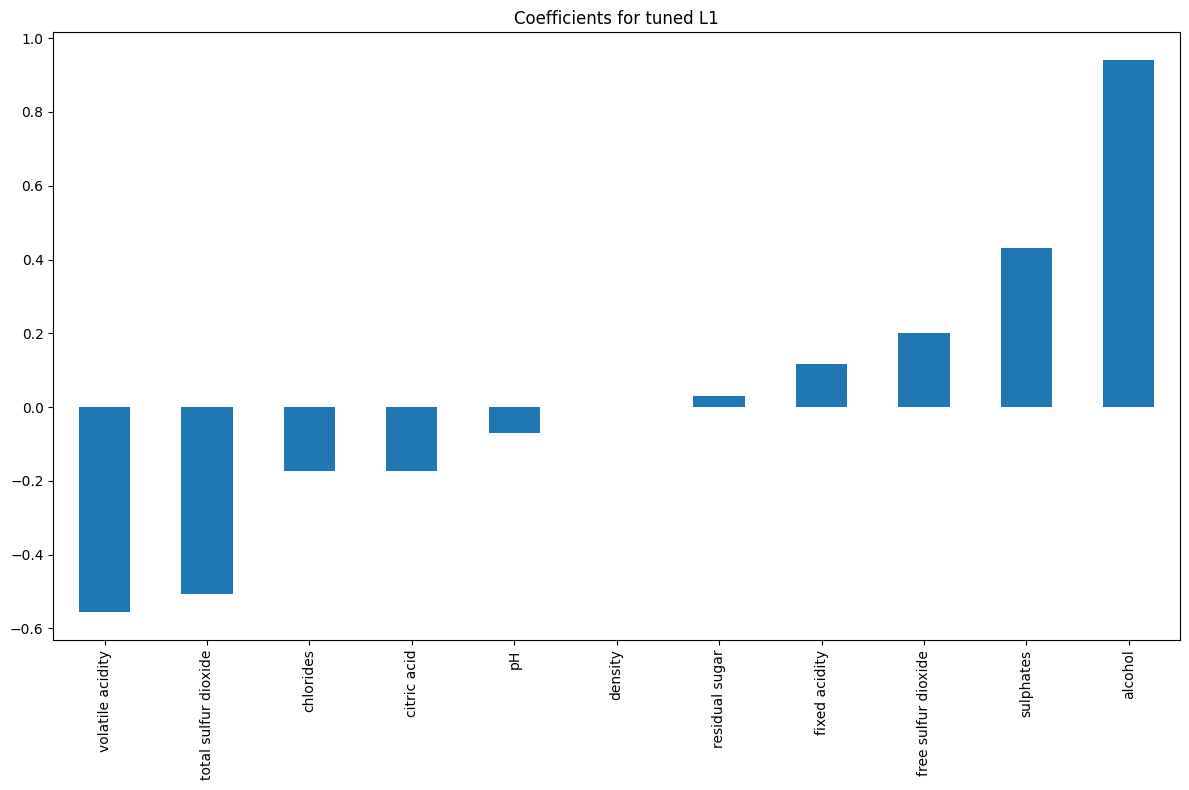

<Figure size 640x480 with 0 Axes>

In [53]:
## 16. Plotting the tuned L1 coefficients
coefficients = clf_l1.coef_.ravel()
coef = pd.Series(coefficients,predictors).sort_values()

plt.figure(figsize = (12,8))
coef.plot(kind='bar', title = 'Coefficients for tuned L1')
plt.tight_layout()
plt.show()
plt.clf()